## Wektory atomiczne

Podstawowy typ danych: wektor atomiczny

przypisanie: operator `=` lub `<-`

`length(x)` - długość wektora

In [1]:
x=c(1,2,3)  # najprostszy sposób deklaracji wektora, za pomocą funkcji c
print(x)
print(class(x))
x2=c("a","b","c","d")
print(class(x2))
length(x)
length(x2)
length(3.14)   #taka liczba to też wektor ( z długością 1)
x3=3.14
x3==3.14  # wektor wartości logicznych
x2 == c("c","c","c","d")


[1] 1 2 3
[1] "numeric"
[1] "character"


[1] 3

[1] 4

[1] 1

[1] TRUE

[1] FALSE FALSE  TRUE  TRUE

Funkcja `c`  generalnie służy do łączenia (konkatenacji, `c`oncatenation). Pisząc `i:j` możemy tworzyć wektor zawierający liczby od `i` do `j` włącznie.

In [2]:
geneList <-readRDS('/kaggle/input/bioinf-assignment/geneExprList.rds')
x1<- c(1,2,3)
x3<- 4:8
big_x<- c(x1,x3)
print(x1)
print(x3)
print(big_x)

[1] 1 2 3
[1] 4 5 6 7 8
[1] 1 2 3 4 5 6 7 8


## Listy
Lista różni się od wektora atomicznego- może zawierać różne typy danych, w tym inne listy (dość podobna do listy w Pythonie). Listę można indeksować tak jak wektor.

In [3]:
list_1<- list(1, "a", "b", 2, list(1,1,2))

In [4]:
length(list_1)

list_1[4:5]

[1] 5

[[1]]
[1] 2

[[2]]
[[2]][[1]]
[1] 1

[[2]][[2]]
[1] 1

[[2]][[3]]
[1] 2

### Lista z nazwanymi elementami

In [5]:
named_l<- list(a1=3, b2=222, trzeci=c(1,2,3))
print(named_l)

$a1
[1] 3

$b2
[1] 222

$trzeci
[1] 1 2 3



In [6]:
names(named_l)

[1] "a1"     "b2"     "trzeci"

In [7]:
named_l[["trzeci"]]
named_l[["a1"]]

[1] 1 2 3

[1] 3

In [8]:
names(named_l)<- c("nowa nazwa1", "nowa nazwa2", "nowa nazwa 3")
print(named_l)

$`nowa nazwa1`
[1] 3

$`nowa nazwa2`
[1] 222

$`nowa nazwa 3`
[1] 1 2 3



## Indeksowanie, 2 sposoby

`x[[i]]` - zawsze zwróci `i`-ty element `x`

`x[i]` - zwróci `i`-ty element `x` w "opakowaniu" (dla `x` wektora atomicznegp będzie to wektor atomiczny, ale dla dla listy- zwróci listę z jednym elementem)

In [9]:

x2= list("a","b","c")
x2[[3]]
x2[3]

[1] "c"

[[1]]
[1] "c"

### Indeksowanie wektorów i list

`x[[i]]` -- weź tylko element na pozycji $i$

`x[i]` -- weź element na pozycji $i$ z opakowaniem (dla wektora atomicznego, będzie to nadal wektor atomiczny, dla listy- lista z jednym elementem)

`x[i:j]` -- weź elementy od `i` do `j` opakowane np. listę od i do j, jeżeli x jest listą.

In [10]:
list_1[1]
list_1[[1]]


[[1]]
[1] 1

[1] 1

In [11]:
print(list_1)
print("podlista elementów list_1 od 4 do 5")
list_1[4:5]

[[1]]
[1] 1

[[2]]
[1] "a"

[[3]]
[1] "b"

[[4]]
[1] 2

[[5]]
[[5]][[1]]
[1] 1

[[5]][[2]]
[1] 1

[[5]][[3]]
[1] 2


[1] "podlista elementów list_1 od 4 do 5"


[[1]]
[1] 2

[[2]]
[[2]][[1]]
[1] 1

[[2]][[2]]
[1] 1

[[2]][[3]]
[1] 2

Wektory wartości logicznych mogą służyć do indeksowania (poniżej- tylko element z indeksem nr 3). Indeksować poprzez wektor wartości logicznych można zarówno listy jak i wektory atomiczne (jak i struktury wielowymiarowe).

In [12]:
x_logical= c(FALSE,FALSE,TRUE,FALSE,
             FALSE,FALSE,FALSE,FALSE)

big_x[x_logical]

[1] 3

test logiczny na wektorze wytworzy wektor wartości logicznych (testowany jest warunek element-po-elemencie)

In [13]:
print(big_x < 4)
logical_test<- (big_x < 4)
big_x[logical_test] #wybierz te elementy które są mniejsze od 4
big_x_reversed<- rev(big_x)  # funkcja rev <- odwraca wektor
print(big_x)
print(big_x_reversed)
print(big_x < big_x_reversed)

[1]  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE


[1] 1 2 3

[1] 1 2 3 4 5 6 7 8
[1] 8 7 6 5 4 3 2 1
[1]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE


## operator %in%

In [14]:
1 %in% c(2:10)
1 %in% c(1:10)

[1] FALSE

[1] TRUE

## Wartości brakujące

In [15]:
#test czy x jest NULL
# NULL to odpowiednik None z Pythona
X<-NULL


In [16]:
is.null(X) # dobrze

[1] TRUE

In [17]:
X== NULL # ŹLE

logical(0)

In [18]:
#NA <- wartość brakująca, zazwyczaj oznacza BRAK DANYCH w wektorze liczbowym
vec_n<- c(1,2,NA)
is.na(vec_n)

[1] FALSE FALSE  TRUE

In [19]:
is.na(vec_n) # dobrze

[1] FALSE FALSE  TRUE

In [20]:
vec_n == NA # ŹLE

[1] NA NA NA

## funkcje, pętle i instrukcje warunkowe w R

In [21]:
funkcja1<- function(x1, x2)
    {
        if (length(x1)!= length(x2)) stop("nie można wykonać następnego testu bo długości x1 i x2 się różnią")
        if (sum(x1 == x2)==length(x1) ) # x1 == x2 <- wektor wartości logicznych TRUE FALSE
            {                           # sum(x1==x2) <- suma wartości TRUE FALSE (TRUE zamieniamy na 1, FALSE na 0)
                                        # sum(x1==x2) == length(x1) <- TRUE, tylko gdy są 3 wartości TRUE,
                                        # czyli x1 i x2 są równe na każdej pozycji.
            print(" x1 i x2 są równe")
            print("coś")
            return(c(1,2,3))
            }
        else
            {
            #print(seq_along(x)
            for (j in seq_along(x)) #seq_along(x) <- wektor wszystkich indeksów jakie ma x
                {
                print(x1[j])}
            return(c(4,5,6))
            
            }
                
            
    }

In [22]:
funkcja1(c(1,2,3),c(1,2,4))

[1] 1
[1] 2
[1] 3


[1] 4 5 6

#### seq_along

In [23]:
v1<-c()
print(seq_along(v1))
v1<-c(7,6,78)
seq_along(v1)

integer(0)


[1] 1 2 3

#### rep

In [24]:
rep(c("a","b"),2)
rep(c("a","b"),each=4)

[1] "a" "b" "a" "b"

[1] "a" "a" "a" "a" "b" "b" "b" "b"

### lapply

`lapply(x, fun, opcjonalne.fun.arg1, opcjonalne.fun.arg2... etc)` - zastosuj funkcję `fun` na każdym elemencie `x` (element-po-elemencie), opcjonalnie z argumentami `opcjonalnie.fun.arg1`, itd... Wyniki wsadź do listy o takiej samej długości co `x`.

Funkcje `apply` oraz `sapply` działają podobnie, ale istotne dla `lapply` jest to, że ZAWSZE zwraca listę, zatem łatwo ogarnąć jej stosowanie. 

In [25]:
list_1
lapply(list_1, rep, 3) # dla kazdego elementu list_1, wykonaj rep z argumentem 3 i wsadz wyniki do listy

[[1]]
[1] 1

[[2]]
[1] "a"

[[3]]
[1] "b"

[[4]]
[1] 2

[[5]]
[[5]][[1]]
[1] 1

[[5]][[2]]
[1] 1

[[5]][[3]]
[1] 2

[[1]]
[1] 1 1 1

[[2]]
[1] "a" "a" "a"

[[3]]
[1] "b" "b" "b"

[[4]]
[1] 2 2 2

[[5]]
[[5]][[1]]
[1] 1

[[5]][[2]]
[1] 1

[[5]][[3]]
[1] 2

[[5]][[4]]
[1] 1

[[5]][[5]]
[1] 1

[[5]][[6]]
[1] 2

[[5]][[7]]
[1] 1

[[5]][[8]]
[1] 1

[[5]][[9]]
[1] 2

In [26]:
V1<- c("a","b","c","d")
V1list<-lapply(V1, rep, 2 )
print(V1list)
V1listunlisted<- unlist(V1list)
print(V1listunlisted)

[[1]]
[1] "a" "a"

[[2]]
[1] "b" "b"

[[3]]
[1] "c" "c"

[[4]]
[1] "d" "d"

[1] "a" "a" "b" "b" "c" "c" "d" "d"


### Inne przydatne funkcje

In [27]:
X<-runif(1000) #1000 liczb losowych z zakresu [0,1]
median(X)            #== quantile(X,0.5)
quantile(X,0.25)

[1] 0.4983997

25% 
0.2581364

# Struktury 2D

## Data frame (ramka danych)

Pod spodem to lista wektorów tej samej długości, a interpretacja i zamysł jest taki- że to po prostu tablica 2D, gdzie różne kolumny mogą przechowywać różne typy danych. Wtedy, jeden wiersz statystycznie rzecz biorąc opisuje zazwyczaj jedną obserwację, kolumny- poszczególne zmienne.

In [28]:
df<-read.csv("https://europepmc.org/journalList?format=csv") # z poprzednich zajęć z artykułami
dim(df) # obiekt 2 wymiarowy 
# n_wierszy n_kolumn

[1] 3911   13

In [29]:
#indeksujemy każdy wymiar z osobna po przecinku:
df[1:5,1:5] #wiersze od 1 do 5 i kolumny od 1 do 5

,Journal.title,NLM.TA,pISSN,eISSN,Publisher
,<chr>,<chr>,<chr>,<chr>,<chr>
1,3 Biotech,3 Biotech,2190-572X,2190-5738,Springer
2,3D Printing in Medicine,3D Print Med,,2365-6271,BioMed Central
3,AACE Clinical Case Reports,AACE Clin Case Rep,,2376-0605,American Association of Clinical Endocrinology
4,The AAPS Journal,AAPS J,,1550-7416,American Association of Pharmaceutical Scientists
5,AAPS PharmSci,AAPS PharmSci,,1522-1059,American Association of Pharmaceutical Scientists


In [30]:
df[1:5,] #wiersze od 1 do 5 i wszystkie kolumny

,Journal.title,NLM.TA,pISSN,eISSN,Publisher,LOCATORplus.ID,Latest.issue,Earliest.volume,Free.access,Open.access,Participation.level,Deposit.status,Journal.URL
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,3 Biotech,3 Biotech,2190-572X,2190-5738,Springer,NA,v.13(1);Jan 2023,v.1;2011,12 months,Some,Full,,http://europepmc.org/journals/1936/
2,3D Printing in Medicine,3D Print Med,,2365-6271,BioMed Central,NA,v.8;Dec 2022,v.2;2016,Immediate,All,Full,,http://europepmc.org/journals/3552/
3,AACE Clinical Case Reports,AACE Clin Case Rep,,2376-0605,American Association of Clinical Endocrinology,NA,v.8(6);Nov-Dec 2022,v.5;2019,Immediate,Some,Full,,http://europepmc.org/journals/3762/
4,The AAPS Journal,AAPS J,,1550-7416,American Association of Pharmaceutical Scientists,NA,v.18(3);May 2016,v.6;2004,,Some,Full,No New Content,http://europepmc.org/journals/262/
5,AAPS PharmSci,AAPS PharmSci,,1522-1059,American Association of Pharmaceutical Scientists,NA,v.6(2);Jun 2004,v.1;1999,Immediate,No,Full,Predecessor,http://europepmc.org/journals/1196/


In [31]:
nrow(df)
ncol(df)

[1] 3911

[1] 13

In [32]:
kolumnaAccess<-df$Open.access # dostęp do kolumny poprzez nazwę, sposób I
unique(kolumnaAccess) # unikalne wartości w danym wektorze


[1] "Some" "All"  "No"

In [33]:
kolumnaAccess<-df[,"Open.access"] #sposób II
table(kolumnaAccess) # funkcja table <- podsumowanie
table(df$Open.access,    #wiersze- OpenAccess
     df$Deposit.status)  #kolumny- Deposit status
                         #komórki- zliczenia obserwacji, takich że Open.access== to po lewej, a Deposit.status== to u góry

kolumnaAccess
 All   No Some 
1938  379 1594 

      
             No New Content   Predecessor 
  All  1445              319           174
  No    134              129           116
  Some 1424              128            42

In [34]:
#data frame to pod spodem lista wetkorów, zatem można użyć funkcji lapply:
#   (kolumny to wektory)

lapply(df, length) # długość każdej kolumny == nrow(df)

$Journal.title
[1] 3911

$NLM.TA
[1] 3911

$pISSN
[1] 3911

$eISSN
[1] 3911

$Publisher
[1] 3911

$LOCATORplus.ID
[1] 3911

$Latest.issue
[1] 3911

$Earliest.volume
[1] 3911

$Free.access
[1] 3911

$Open.access
[1] 3911

$Participation.level
[1] 3911

$Deposit.status
[1] 3911

$Journal.URL
[1] 3911

### Funkcje apply i działające po kolumnach i wierszach (analogicznie do lapply)

In [35]:
#apply(Obiekt2D, nr_wymiaru, funkcja, opcjonalnie.pozostałe.argumenty.funkcji)
# nr_ymiaru = 1 <- po wierszach
# nr_wymiaru= 2 <- po kolumnach
result<-apply(df,2,unique)   # sprawdzamy unikalne elementy w każdej kolumnie
class(result)                # korzystając z apply- warto sprawdzić typ zwróconego obiektu
lapply(result, function(x) x[1:5])   #weź z każdego elementu result 5 pierwszych elementów

[1] "list"

$Journal.title
[1] "3 Biotech"                  "3D Printing in Medicine"   
[3] "AACE Clinical Case Reports" "The AAPS Journal"          
[5] "AAPS PharmSci"             

$NLM.TA
[1] "3 Biotech"          "3D Print Med"       "AACE Clin Case Rep"
[4] "AAPS J"             "AAPS PharmSci"     

$pISSN
[1] "2190-572X" ""          "2374-7943" "1672-9145" "0392-4203"

$eISSN
[1] "2190-5738" "2365-6271" "2376-0605" "1550-7416" "1522-1059"

$Publisher
[1] "Springer"                                         
[2] "BioMed Central"                                   
[3] "American Association of Clinical Endocrinology"   
[4] "American Association of Pharmaceutical Scientists"
[5] "African Academy of Sciences"                      

$LOCATORplus.ID
[1] NA NA NA NA NA

$Latest.issue
[1] "v.13(1);Jan 2023"    "v.8;Dec 2022"        "v.8(6);Nov-Dec 2022"
[4] "v.18(3);May 2016"    "v.6(2);Jun 2004"    

$Earliest.volume
[1] "v.1;2011" "v.2;2016" "v.5;2019" "v.6;2004" "v.1;1999"

$Free.access
[1] "12 months"         "Immediate"         ""                 
[4] "12 months or less" "6 months"         

$Open.access
[1] "Some" "All"  "No"   NA     NA    

$Participation.level
[1] " Full "          " NIH Portfolio " NA                NA               
[5] NA               

$Deposit.status
[1] " "                " No New Content " " Predecessor "    NA                
[5] NA                

$Journal.URL
[1] "http://europepmc.org/journals/1936/" "http://europepmc.org/journals/3552/"
[3] "http://europepmc.org/journals/3762/" "http://europepmc.org/journals/262/" 
[5] "http://europepmc.org/journals/1196/"

## Funkcja tapply (grupująca, jak GROUP BY z SQL)

In [36]:
#tapply(wektor_wartości, wektor_grupujący_lub_lista_wektorów_grupujących, 
#funkcja_do_zastosowania_w_grupach)
tapply(df$Journal.title, df$Open.access,
       length) # ile jest tytułów czasopism z danym poziomiem Open.access
tapply(df$Journal.title, list(df$Open.access, df$Free.access),
      length)   # ile jest tytułów czasopism z danym poziomem Open.access i 
                # czasem wolnego dostępu (free.acess)
                # NA <- 0


#dodanie bezsensownej :) kolumny z danymi numerycznymi do df
df$title.length<- unlist(lapply(df$Journal.title,nchar)) #liczba znaków w Journal.title
df[1:5,]$Journal.title
df[1:5,]$title.length

All   No Some 
1938  379 1594

,,0 months or more,1 month,12 months,12 months or less,2 months,2 months or less,24 months,24 months or less,3 months,3 months or more,36 months,36 months or less,6 months,6 months or less,Immediate
All,319,NA,1,4,NA,1,NA,NA,NA,NA,NA,NA,NA,1,NA,1612
No,130,NA,1,37,1,NA,NA,2,1,2,NA,1,NA,11,NA,193
Some,128,1,4,460,35,1,1,2,NA,1,1,NA,1,20,13,926


[1] "3 Biotech"                  "3D Printing in Medicine"   
[3] "AACE Clinical Case Reports" "The AAPS Journal"          
[5] "AAPS PharmSci"

[1]  9 23 26 16 13

In [37]:
#tapply z danymi numerycznymi:
tapply(df$title.length, df$Open.access, mean) #średnia długość tytułu w podziale na Open.access
print("***********")
print("***********")
print("***********")
print("***********")
print("***********")
tapply(df$title.length, list(df$Open.access,
                             df$Free.access), sum) #suma liter tworzących tytuły każdego czasompisma z danym
                                              #poziomem Open.access oraz Free.access

All       No     Some 
31.05573 35.74670 31.25408

[1] "***********"
[1] "***********"
[1] "***********"
[1] "***********"
[1] "***********"


,,0 months or more,1 month,12 months,12 months or less,2 months,2 months or less,24 months,24 months or less,3 months,3 months or more,36 months,36 months or less,6 months,6 months or less,Immediate
All,9189,NA,27,102,NA,28,NA,NA,NA,NA,NA,NA,NA,51,NA,50789
No,4152,NA,34,1406,20,NA,NA,60,42,64,NA,28,NA,343,NA,7399
Some,3658,43,145,15150,1131,50,29,34,NA,34,37,NA,40,686,395,28387


## Macierze

In [38]:
A<- matrix(c(1,2,3,4,5,6,7,8,9,10), nrow=2)
A

1,3,5,7,9
2,4,6,8,10


In [39]:
B<- rbind(c(1,2,3),
         c(2,3,4)) #rowbind
class(B)
B

[1] "matrix" "array"

1,2,3
2,3,4


In [40]:
dim(A)
dim(B)

[1] 2 5

[1] 2 3

In [41]:
apply(A,2,mean) # średnie po kolumnach (można też po dataframe jeżeli zawiera liczby)
#funkcje działające szybko:
print(A)
rowMeans(A)
colMeans(A)
print(B)
rowSums(B)
colSums(B)

[1] 1.5 3.5 5.5 7.5 9.5

     [,1] [,2] [,3] [,4] [,5]
[1,]    1    3    5    7    9
[2,]    2    4    6    8   10


[1] 5 6

[1] 1.5 3.5 5.5 7.5 9.5

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    2    3    4


[1] 6 9

[1] 3 5 7

In [42]:
B_transposed<- t(B) #transpozycja macierzy, funkcja t
print(B)
print(B_transposed)

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    2    3    4
     [,1] [,2]
[1,]    1    2
[2,]    2    3
[3,]    3    4


In [43]:
B %*% B_transposed #mnożenie macierzy 2X3 %*% 3X2 = 2X2

14,20
20,29


In [44]:
BBt<-B %*% B_transposed
diag(BBt) # przekątna

[1] 14 29

## Funkcja t.test i korekta p.wartości

In [45]:
#generujemy zabawkowe dane

my_x= rnorm(1300)
my_x[500:length(my_x)]= my_x[500:length(my_x)] + 3
my_y= c ( rep(0, 499),rep(1, length(500:length(my_x)) ))

In [46]:
mean(my_x)
mean(my_x[my_y==0])
mean(my_x[my_y==1])

[1] 1.8143

[1] -0.06222242

[1] 2.98332

In [47]:
tres<-t.test(my_x[my_y==0], my_x[my_y==1]) # sprawdzamy, czy roznica w srednich w my_x pomiędzy grupami
                                     # jest istotna statystycznie.
print(tres)


	Welch Two Sample t-test

data:  my_x[my_y == 0] and my_x[my_y == 1]
t = -52.251, df = 1035.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.159916 -2.931169
sample estimates:
  mean of x   mean of y 
-0.06222242  2.98331982 



In [48]:
names(tres) # najbardziej istotne- p.value :)

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
 [6] "null.value"  "stderr"      "alternative" "method"      "data.name"

In [49]:
tres$p.value # w cholerę istotnie statystyczny wynik.

[1] 1.570146e-292

In [50]:
# tworzymy dodatkową zmienną my_x2, prawie identyczną, tylko ze średnią -3 w grupie my_y==1
my_x2= rnorm(1300)
my_x2[500:length(my_x2)]= my_x2[500:length(my_x2)] - 3
#tworzymy 3 zmienną, bez różnciy w średnich
my_x3= rnorm(1300)
#spinamy w strukturę 2D wszystkie zmienne
my_X<- cbind(my_x, my_x2, my_x3)
# robimy t.test dla każdej ze zmiennych i wyciągamy p.value
test.pvalues<-apply(my_X,2, function(x) t.test(x[my_y==0],x[my_y==1])$p.value)
test.pvalues  # tylko 2 istotnie statystycznie, jak należy. (p.value < 0.05)

my_x         my_x2         my_x3 
1.570146e-292 2.869936e-279  3.928482e-01

In [51]:
#FORMALNIE powyższe jest ŹLE
#testując kilka hipotez naraz (akurat tutaj 3, po jednej dla każdej ze zmiennych)
#trzeba zastosować korektę wynikającą z wielokrotnych porównań
# do tego służy p.adjust
#argumenty p.adjust:
names(formals(p.adjust))
#argumenty wymagane:
#p - wektor p-wartości do korekty
#method - łańcuch znaków określający, jak chcemy wykonać korektę,
#Funkcja zwraca - wektor p.wartości po korekcie
#możliwe wartości method:
print("wartości dla method w funkcji p.adjust")
p.adjust.methods

[1] "p"      "method" "n"

[1] "wartości dla method w funkcji p.adjust"


[1] "holm"       "hochberg"   "hommel"     "bonferroni" "BH"        
[6] "BY"         "fdr"        "none"

In [52]:
padjusted<-p.adjust(test.pvalues, method='bonferroni')
print(padjusted)

         my_x         my_x2         my_x3 
4.710437e-292 8.609809e-279  1.000000e+00 


In [53]:
#teraz można formalnie orzec, gdzie jest istotnie statystyczna różnica na poziomie 0.05:
padjusted < 0.05

my_x my_x2 my_x3 
 TRUE  TRUE FALSE

## Wykresy i wizualizacje

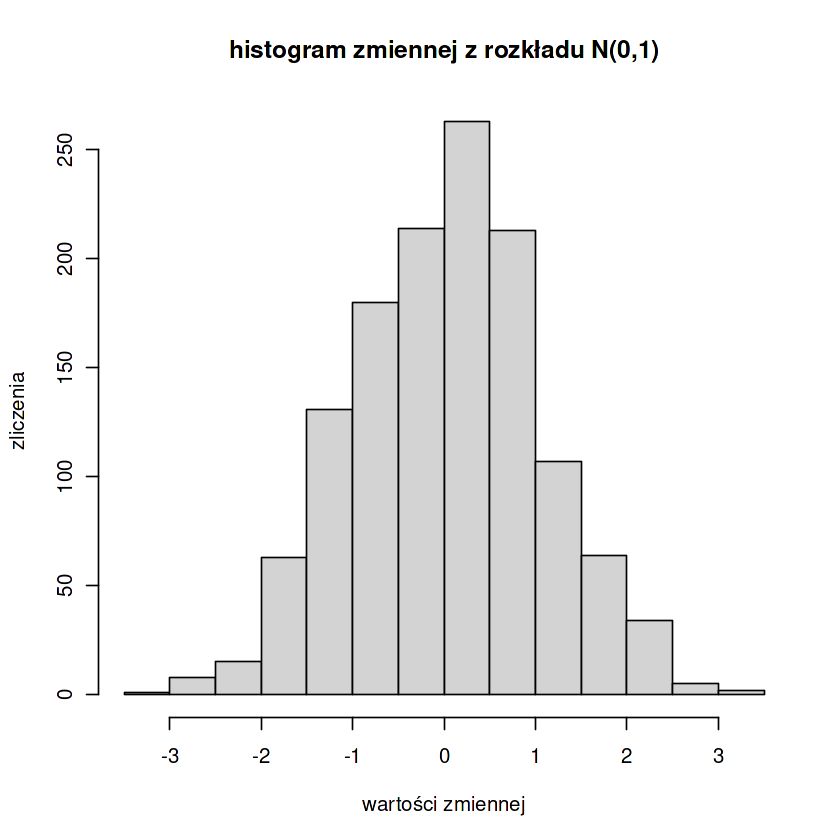

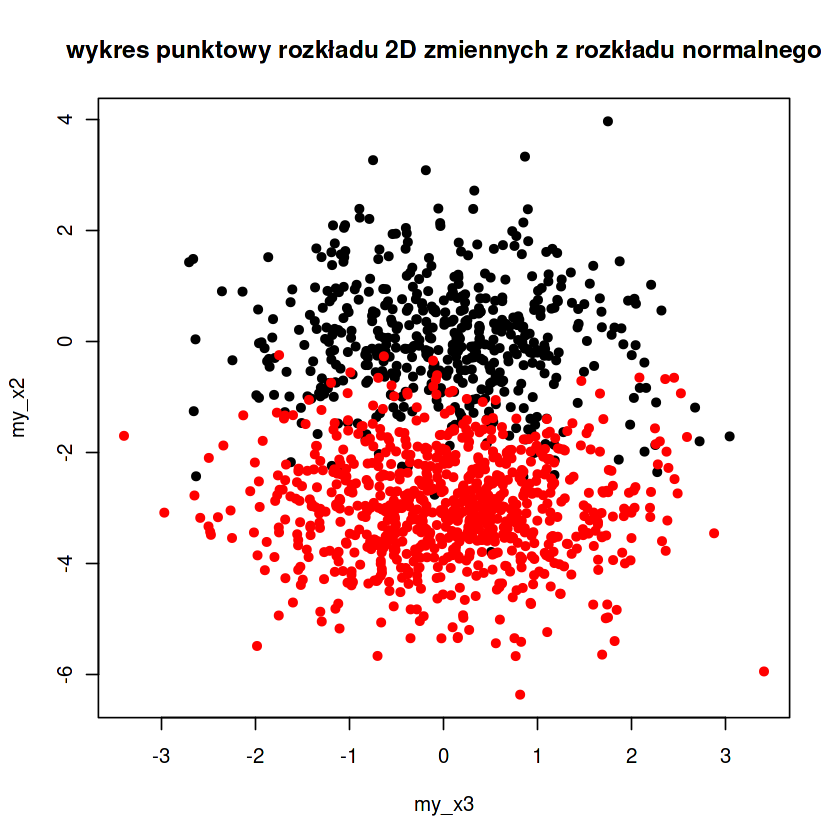

In [54]:
hist(my_x3, main="histogram zmiennej z rozkładu N(0,1)",
     xlab="wartości zmiennej",
     ylab="zliczenia ",
     xlim=c(-3.5,3.5))

plot(my_x3, my_x2, main="wykres punktowy rozkładu 2D zmiennych z rozkładu normalnego",
    pch=16,#kształt punktu
    col=ifelse(my_y==1,"red","black"))#kolory